<a href="https://colab.research.google.com/github/drpetros11111/Complete_ComputerVisiom_Krishn/blob/CV2_Merged_notebooks/CV2_Capabilities_merged_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CV_SSD

# Import the Libraries

In [ ]:
import torch
from torch.autograd import Variable
import cv2
from data import BaseTransform, VOC_CLASSES as labelmap
from ssd import build_ssd
import imageio

# Import the Libraries
This code snippet is importing necessary libraries for object detection, likely using a pre-trained SSD (Single Shot MultiBox Detector) model.


---
----
Here's a step-by-step explanation:

##import torch:
This imports the PyTorch library, a fundamental library for deep learning and tensor computations.

PyTorch is commonly used for building and training neural networks.

------------
##from torch.autograd import Variable:

This imports the Variable class from the torch.autograd module.

In older versions of PyTorch, Variable was used to wrap tensors and enable automatic differentiation.

However, in newer versions, tensors themselves can track gradients, so Variable might be less relevant.

---------------
##import cv2:
This imports the OpenCV (cv2) library, which is widely used for computer vision tasks like image processing, object detection, and video analysis.

-------------------
##from data import BaseTransform, VOC_CLASSES as labelmap:

This imports BaseTransform and VOC_CLASSES from a custom module or file named data.

BaseTransform is likely a class or function responsible for applying transformations to images (e.g., resizing, normalization) before feeding them into the SSD model.

VOC_CLASSES is being imported and renamed to labelmap.

This suggests that it holds a list of object classes the model is trained to detect (likely based on the PASCAL VOC dataset).

-----------------------
##from ssd import build_ssd:


This imports the build_ssd function from a custom module or file named ssd.

This function is likely responsible for constructing the SSD model architecture.

------------------------
##import imageio:
This imports the imageio library, which is used for reading and writing various image and video formats.

This library is probably here to load images or videos that will be processed by the object detection model.

------------------------
#In essence
This block of code sets up the necessary tools for loading an SSD model, preprocessing images, and performing object detection using PyTorch and OpenCV in your Colab environment.

# Define the Detection Function

In [ ]:
def detect(frame, net, transform):
    # 1. Get frame dimensions
    height, width = frame.shape[:2]

    # 2. Transform the frame
    frame_t = transform(frame)[0]

    # 3. Convert to PyTorch tensor and format
    x = torch.from_numpy(frame_t).permute(2, 0, 1)
    x = Variable(x.unsqueeze(0))

    # 4. Make prediction
    y = net(x)
    detections = y.data

    # 5. Create scale for bounding boxes
    scale = torch.Tensor([width, height, width, height])

    # 6. Loop through detections
    for i in range(detections.size(1)):
        j = 0
        while detections[0, i, j, 0] >= 0.6:
            # 7. Get coordinates and draw bounding box
            pt = (detections[0, i, j, 1:] * scale).numpy()
            cv2.rectangle(frame, (int(pt[0]), int(pt[1])), (int(pt[2]), int(pt[3])), (255, 0, 0), 2)

            # 8. Add label text
            cv2.putText(frame, labelmap[i - 1], (int(pt[0]), int(pt[1])), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)
            j += 1

    # 9. Return the frame with detections
    return frame

# Break down the detect function

----
---

## Get Frame Dimensions:
It gets the height and width of the input
frame using frame.shape[:2].

In the context of frame.shape[:2], the [:2] is used for slicing the shape tuple of the frame.

It selects the elements from index 0 up to (but not including) index 2.

##frame.shape:

This attribute returns a tuple representing the dimensions of the frame (image or video frame).

For example, if the frame is a color image with a height of 480 pixels and a width of 640 pixels, then frame.shape would be (480, 640, 3).

The 3 represents the number of color channels (RGB).

     [:2]:

This slicing notation selects the first two elements of the frame.shape tuple, which correspond to the height and width of the frame.

The reason for using slicing [:2] is to conveniently extract both height and width simultaneously and assign them to separate variables in a single line of code.

Let's break it down:

frame.shape: This returns a tuple representing the dimensions of the frame. For example, (480, 640, 3) for a color image.

##frame.shape[0]:
This would only access the first element of the tuple, which is the height (480 in the example).

##frame.shape[1]:
This would access the second element, which is the width (640 in the example).

Instead of writing two separate lines to get height and width:


    height = frame.shape[0]
    width = frame.shape[1]

We can use slicing [:2] to achieve the same result in one line:


    height, width = frame.shape[:2]

This is more concise and readable, as it directly unpacks the first two elements of the tuple into the height and width variables.

Therefore, slicing [:2] is used for convenience and conciseness in extracting both height and width simultaneously. It's a common practice in Python to use slicing for extracting multiple elements from sequences like tuples and lists.

----------------------
#Example:


    frame =  # your image or video frame
    height, width = frame.shape[:2]
    print("Height:", height)  
    print("Width:", width)

This would print the height and width values of the frame.

In essence, the 2 in frame.shape[:2] acts as the upper bound of the slice, specifying that we want to select elements up to index 2 (excluding index 2 itself).

This allows us to conveniently extract the height and width information from the frame's shape.

--------------------
##Transform the Frame:
Applies a transformation (likely resizing and normalization) to the frame using the provided transform function.

--------------------------
##Convert to PyTorch Tensor and Format:

Converts the transformed frame to a PyTorch tensor using torch.from_numpy().

-----------------
##Reorders the dimensions (channels, height, width) using permute(2, 0, 1).

----------------------
##Adds a batch dimension using unsqueeze(0).

Wraps the tensor in a Variable (might be redundant in newer PyTorch versions).

-------------------
##Make Prediction:
Passes the formatted tensor x through the neural network net to get the detection output y.

Extracts the detection data using y.data.

--------------------
##Create Scale for Bounding Boxes:
Creates a scaling tensor to convert the normalized bounding box coordinates to the original frame's dimensions.

---------------------
##Loop through Detections:
Iterates through the detected objects.

--------------------------
##Get Coordinates and Draw Bounding Box:
Extracts the bounding box coordinates (pt) from the detection data, scales them using the scale tensor, and converts them to NumPy array.

----------------------
##Draws a rectangle on the frame using cv2.

rectangle with the calculated coordinates, color (blue - (255, 0, 0)), and thickness.

-----------------------------
##Add Label Text
Adds the label of the detected object (from labelmap) to the frame using cv2.putText near the bounding box.

It specifies font, size, color, thickness, and line type.

-------------------------
##Return the Frame with Detections:

Returns the modified frame with the drawn bounding boxes and labels.

------------------------------
--------------------

#In summary
This function takes an image frame, a pre-trained object detection model (net), and a transformation function (transform) as input.

It preprocesses the frame, makes predictions using the model, and then draws bounding boxes and labels around the detected objects before returning the modified frame.

#Creating the SSD neural network

In [ ]:
net = build_ssd('test')
net.load_state_dict(torch.load('ssd300_mAP_77.43_v2.pth', map_location = lambda storage, loc: storage))

# Build the SSD network -from pretrained

-----------------
---------------------
##net = build_ssd('test'):

This line creates an instance of the SSD (Single Shot MultiBox Detector) model.

build_ssd is a function (likely defined in your ssd module) that constructs the SSD model architecture.

The argument 'test' is passed to build_ssd, indicating that the model is being built for testing/inference purposes (as opposed to training).

----------------------
##net.load_state_dict(torch.load('ssd300_mAP_77.43_v2.pth', map_location = lambda storage, loc: storage)):

This line loads pre-trained weights into the SSD model.

###torch.load('ssd300_mAP_77.43_v2.pth', map_location = lambda storage, loc: storage):

This part loads the saved state dictionary (containing model weights and biases) from the file ssd300_mAP_77.43_v2.pth.

The map_location argument is used to handle loading the model on different devices (e.g., CPU instead of GPU). In this case, it's using a lambda function to keep the storage location as is.

###net.load_state_dict(...):

This part takes the loaded state dictionary and assigns the weights and biases to the corresponding parameters within the net model instance.

------------------
------------------------
#In essence:

This code snippet first builds an SSD model for testing and then loads pre-trained weights from a file into the model.

This allows you to use a pre-trained model for object detection without having to train it from scratch. This is a common practice in deep learning to leverage existing models and save training time.

In [ ]:
#Converting Images from BGR to RGB

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# !pip install matplotlib
# !pip install numpy

In [ ]:
image = cv2.imread("../images/giraffe-Kenya.png")

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Converting Images


---
---


##Line 1: image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

This line converts an image from the BGR (Blue, Green, Red) color space to the RGB (Red, Green, Blue) color space.

Breakdown:

##cv2.cvtColor():

This is a function from the OpenCV library (cv2) used for color space conversions.

##image:
This is the input image, assumed to be in BGR format (which is common for OpenCV when loading images).

##cv2.COLOR_BGR2RGB:
This is a constant that specifies the conversion type, in this case from BGR to RGB.

##image_rgb:
The converted image is stored in this variable.

##Reasoning:
OpenCV often loads images in BGR format by default.

However, many other libraries and tools, such as Matplotlib (which is likely used later in your code for displaying the image), expect images to be in RGB format.

This conversion ensures compatibility.

----------------
##Line 2: image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

This line converts the original image from BGR to the HSV (Hue, Saturation, Value) color space.

##cv2.cvtColor():

The same color conversion function as before.
image: The original input image (still in BGR).

##cv2.COLOR_BGR2HSV:
This constant specifies the conversion from BGR to HSV.

##image_hsv:
The converted image (now in HSV) is stored in this variable.

##Reasoning:
The HSV color space is often preferred for tasks like color-based segmentation or object tracking because it separates color information (hue) from brightness (value) and intensity (saturation).

This can make it easier to define color ranges for specific objects or regions, as seen in later parts of your code.

----------------
#In simpler terms:

Imagine you have a box of crayons labeled with color names.

The first line is like taking the crayons labeled "Blue, Green, Red" and relabeling them as "Red, Green, Blue" to match how another person organizes their crayons.

The second line is like taking the same box of crayons and organizing them not by color names but by their hue, how vibrant they are (saturation), and how light or dark they are (value).

This new organization might be more useful for specific tasks, like finding all the bright, reddish crayons.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# !pip install matplotlib
# !pip install numpy

In [ ]:
image = cv2.imread("../images/giraffe-Kenya.png")

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Converting Images from BGR to RGB


---
---


##Line 1: image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

This line converts an image from the BGR (Blue, Green, Red) color space to the RGB (Red, Green, Blue) color space.

Breakdown:

##cv2.cvtColor():

This is a function from the OpenCV library (cv2) used for color space conversions.

##image:
This is the input image, assumed to be in BGR format (which is common for OpenCV when loading images).

##cv2.COLOR_BGR2RGB:
This is a constant that specifies the conversion type, in this case from BGR to RGB.

##image_rgb:
The converted image is stored in this variable.

##Reasoning:
OpenCV often loads images in BGR format by default.

However, many other libraries and tools, such as Matplotlib (which is likely used later in your code for displaying the image), expect images to be in RGB format.

This conversion ensures compatibility.

----------------
##Line 2: image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

This line converts the original image from BGR to the HSV (Hue, Saturation, Value) color space.

##cv2.cvtColor():

The same color conversion function as before.
image: The original input image (still in BGR).

##cv2.COLOR_BGR2HSV:
This constant specifies the conversion from BGR to HSV.

##image_hsv:
The converted image (now in HSV) is stored in this variable.

##Reasoning:
The HSV color space is often preferred for tasks like color-based segmentation or object tracking because it separates color information (hue) from brightness (value) and intensity (saturation).

This can make it easier to define color ranges for specific objects or regions, as seen in later parts of your code.

----------------
#In simpler terms:

Imagine you have a box of crayons labeled with color names.

The first line is like taking the crayons labeled "Blue, Green, Red" and relabeling them as "Red, Green, Blue" to match how another person organizes their crayons.

The second line is like taking the same box of crayons and organizing them not by color names but by their hue, how vibrant they are (saturation), and how light or dark they are (value).

This new organization might be more useful for specific tasks, like finding all the bright, reddish crayons.

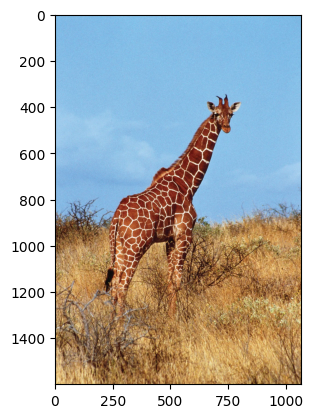

In [ ]:
plt.imshow(image_rgb)

In [ ]:
lower_white = np.array([0,0,190])
upper_white = np.array([30,80,255])

# Define Color Ranges
These two lines of code define lower and upper boundaries for the color white in the HSV (Hue, Saturation, Value) color space.

They are used to create a mask that isolates white-ish regions in an image.

---
---


Explanation:

##HSV Color Space:
Unlike the RGB (Red, Green, Blue) color space that you might be more familiar with, HSV represents colors using Hue (color shade), Saturation (color intensity), and Value (brightness).

----
##lower_white and upper_white:

These variables store NumPy arrays representing the lower and upper bounds for the white color in HSV.

------------------
##lower_white = np.array([0, 0, 190]):

This defines the lower bound for white as Hue = 0, Saturation = 0, and Value = 190.

-------------------
##upper_white = np.array([30, 80, 255]):

This defines the upper bound for white as Hue = 30, Saturation = 80, and Value = 255.

-------------
-----------------
#Creating a Mask:

These bounds are then used with the cv2.inRange() function to create a binary mask.

Pixels within the defined HSV range (between lower_white and upper_white) will be marked as white (255) in the mask, while pixels outside the range will be marked as black (0).

------------------
#In simpler terms:

Imagine you want to select all the "white-ish" areas in a picture.

These lines of code define what you consider "white-ish" in terms of hue, saturation, and value.

The cv2.inRange() function then creates a black and white image (a mask) where the white areas correspond to the "white-ish" parts of the original image.

In [ ]:
mask = cv2.inRange(image_hsv, lower_white, upper_white)

# Creating a Color Mask

This line creates a mask that identifies the pixels in the image that fall within a specific color range.

In this case, the color range is defined by lower_white and upper_white, which represent the lower and upper bounds for white color in the HSV color space, respectively.

-------------
-----------------
#Breakdown:

##cv2.inRange():

This is an OpenCV function that checks if array elements lie between two other arrays.

It takes three arguments:

##image_hsv:

The input image in the HSV color space.

##lower_white:

The lower bound of the color range.

##upper_white:
The upper bound of the color range.

---------------
##mask:
The output of the cv2.inRange() function is stored in this variable.

It is a binary image (mask) where pixels within the specified color range are white (255) and pixels outside the range are black (0).

Purpose:

The purpose of this line is to isolate specific color regions in the image.

By applying this mask to the original image, you can perform operations only on the pixels that fall within the desired color range.

--------------------
#In simpler terms:

Imagine you have a basket of fruits and you want to select only the apples.

This line of code is like creating a filter that only lets apples pass through.

The mask is like the filter, and it identifies the apples (pixels within the color range) in the basket (image).

You can then use this filter to separate the apples from the other fruits.

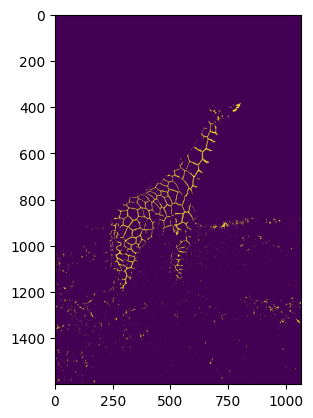

In [ ]:
plt.imshow(mask)

In [ ]:
black_hsv = np.uint8([[[120, 255, 0]]])
black_bgr = cv2.cvtColor(black_hsv, cv2.COLOR_HSV2BGR)[0][0]

# Defining a dark or "black" color and preparing to use it for further image processing

These lines define a color in the HSV color space and then convert it to the BGR color space. Specifically, they are defining a dark or "black" color and preparing to use it for further image processing.

-----
-----------
#Breakdown:

##black_hsv = np.uint8([[[120, 255, 0]]]):

This line defines a color in the HSV (Hue, Saturation, Value) color space.

np.uint8: Creates an 8-bit unsigned integer array, suitable for representing color values.

##[[[120, 255, 0]]]:

This represents the HSV values of the color:

##Hue (H):
120 (This could represent a shade around blue/green, depending on the HSV range being used)

##Saturation (S):
255 (Fully saturated, meaning the color is pure and not mixed with white)

##Value (V):
0 (Very dark, essentially black since there's no brightness)

------------------------------------
#black_bgr = cv2.cvtColor(black_hsv, cv2.COLOR_HSV2BGR)[0][0]:

This line converts the color from HSV to BGR (Blue, Green, Red), which is the color space often used by OpenCV.

##cv2.cvtColor():
This is the OpenCV function used for color space conversion.

##black_hsv:
The input color in HSV.

##cv2.COLOR_HSV2BGR:
Specifies the conversion from HSV to BGR.
[0][0]:

Explanation:

cv2.cvtColor(black_hsv, cv2.COLOR_HSV2BGR): This part of the code converts the color from HSV to BGR and returns a 3-dimensional NumPy array. The array structure looks like this: [[[B, G, R]]], where B, G, and R represent the Blue, Green, and Red color values, respectively.

[0][0]: This is used for indexing or accessing specific elements within the NumPy array.

[0]: This selects the first element of the outermost array, which is [[B, G, R]].

[0]: This selects the first element of the inner array, which is [B, G, R].

Since this is the final level, we get a 1-dimensional array with the actual BGR color values.

Result: Combining these indexing steps, [0][0] effectively extracts the BGR values of the converted color.


#In simpler terms:

Imagine the converted color is stored in a box within a box within a box.

The first [0] opens the outermost box to access the inner box.

The second [0] opens the inner box to access the actual color values (B, G, R).

---------------------
#Example:

If the converted color in BGR is (25, 50, 100), then black_bgr would be assigned the array [25, 50, 100] due to the [0][0] indexing.

This is used to access the color values from the resulting array, extracting the BGR values.

##Purpose:

The purpose of these lines is to define a color that will likely be used later to replace or modify pixels in an image.

By creating black_bgr, the code now has the BGR representation of the desired color ready for operations like replacing pixels within the masked region of an image.

-----------------------
#In simpler terms:

The first line is like saying, "I want a very dark blue/green color, but describe it using hue, saturation, and value."

The second line is like saying, "Okay, now translate that color description so that OpenCV understands it and can use it for its image operations."

In [ ]:
image_result = image.copy()
image_result[mask>0] = black_bgr

## Applying the mask

These lines are applying the color defined by black_bgr to the original image (image) but only where the mask (mask) has a value greater than 0 (which corresponds to the white or "selected" areas in the mask).

In essence, it's replacing specific regions of the original image with the color black_bgr.

---------
---------------
#Breakdown:

##image_result = image.copy():

This line creates a copy of the original image and assigns it to the variable image_result.

This is done to preserve the original image and work on a separate copy for modifications.

##image_result[mask>0] = black_bgr:

This line performs the color replacement. Let's break it down further:

##mask>0:
This creates a Boolean mask (an array of True/False values).

It evaluates each element of the mask array and sets it to True if the value is greater than 0, and False otherwise.

Remember that the mask contains 255 for the regions of interest (white pixels) and 0 for the rest (black pixels).

##image_result[mask>0]:
This selects the pixels in the image_result array where the corresponding element in the Boolean mask is True (i.e., where the mask has a value greater than 0).

##= black_bgr:
This assigns the color defined by black_bgr to the selected pixels in image_result.

---------------
#Purpose:

The purpose of these lines is to modify specific regions of the original image by applying the color black_bgr to those regions identified by the mask.

In this specific case, it's likely aiming to replace the "white-ish" areas (identified by the mask) with the dark color defined earlier.

---------------
#In simpler terms:

Imagine you have a picture, and you've created a stencil (the mask) to highlight certain areas.

These lines are like taking a paintbrush dipped in the color black_bgr and painting over the areas of the picture that are visible through the stencil.

It leaves the rest of the image untouched.

In [ ]:
image_result_rgb = cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB)

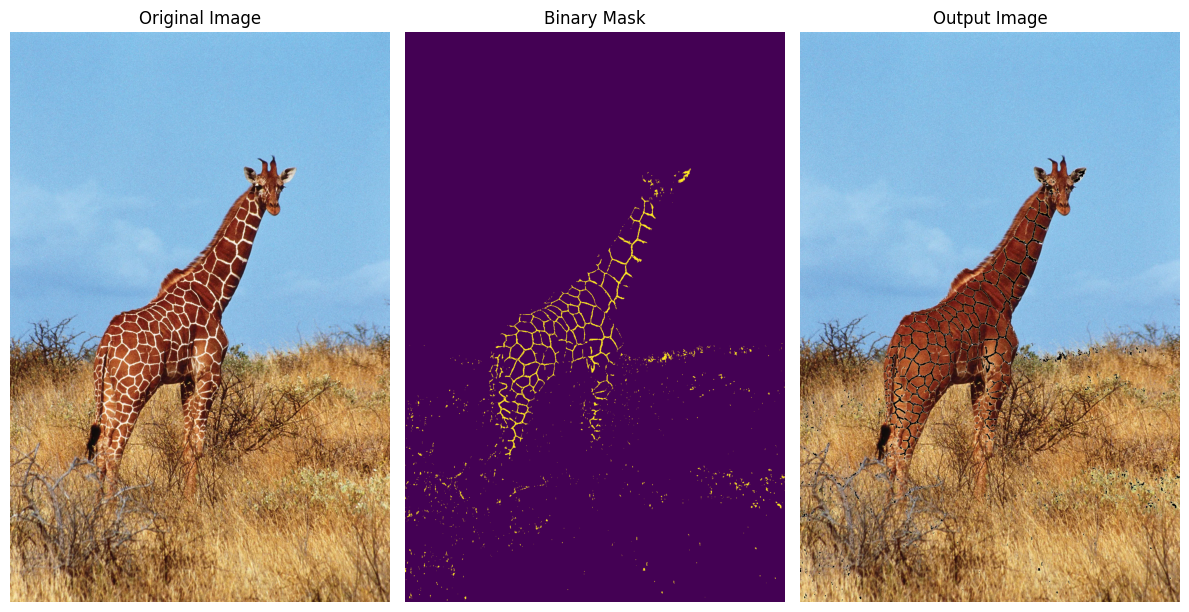

In [ ]:
# PLOT

fig, axs = plt.subplots(1,3, figsize=(12,6))

axs[0].imshow(image_rgb)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(mask)
axs[1].set_title("Binary Mask")
axs[1].axis('off')


axs[2].imshow(image_result_rgb)
axs[2].set_title("Output Image")
axs[2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# !pip install matplotlib
# !pip install numpy

In [ ]:
image = cv2.imread("../images/giraffe-Kenya.png")

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Converting Images from BGR to RGB


---
---


##Line 1: image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

This line converts an image from the BGR (Blue, Green, Red) color space to the RGB (Red, Green, Blue) color space.

Breakdown:

##cv2.cvtColor():

This is a function from the OpenCV library (cv2) used for color space conversions.

##image:
This is the input image, assumed to be in BGR format (which is common for OpenCV when loading images).

##cv2.COLOR_BGR2RGB:
This is a constant that specifies the conversion type, in this case from BGR to RGB.

##image_rgb:
The converted image is stored in this variable.

##Reasoning:
OpenCV often loads images in BGR format by default.

However, many other libraries and tools, such as Matplotlib (which is likely used later in your code for displaying the image), expect images to be in RGB format.

This conversion ensures compatibility.

----------------
##Line 2: image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

This line converts the original image from BGR to the HSV (Hue, Saturation, Value) color space.

##cv2.cvtColor():

The same color conversion function as before.
image: The original input image (still in BGR).

##cv2.COLOR_BGR2HSV:
This constant specifies the conversion from BGR to HSV.

##image_hsv:
The converted image (now in HSV) is stored in this variable.

##Reasoning:
The HSV color space is often preferred for tasks like color-based segmentation or object tracking because it separates color information (hue) from brightness (value) and intensity (saturation).

This can make it easier to define color ranges for specific objects or regions, as seen in later parts of your code.

----------------
#In simpler terms:

Imagine you have a box of crayons labeled with color names.

The first line is like taking the crayons labeled "Blue, Green, Red" and relabeling them as "Red, Green, Blue" to match how another person organizes their crayons.

The second line is like taking the same box of crayons and organizing them not by color names but by their hue, how vibrant they are (saturation), and how light or dark they are (value).

This new organization might be more useful for specific tasks, like finding all the bright, reddish crayons.

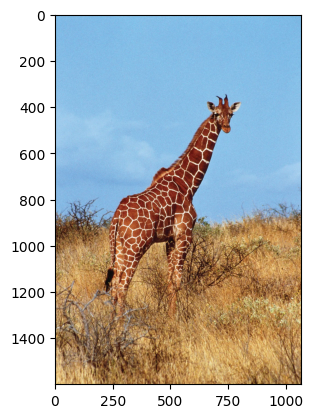

In [ ]:
plt.imshow(image_rgb)

In [ ]:
lower_white = np.array([0,0,190])
upper_white = np.array([30,80,255])

# Define Color Ranges
These two lines of code define lower and upper boundaries for the color white in the HSV (Hue, Saturation, Value) color space.

They are used to create a mask that isolates white-ish regions in an image.

---
---


Explanation:

##HSV Color Space:
Unlike the RGB (Red, Green, Blue) color space that you might be more familiar with, HSV represents colors using Hue (color shade), Saturation (color intensity), and Value (brightness).

----
##lower_white and upper_white:

These variables store NumPy arrays representing the lower and upper bounds for the white color in HSV.

------------------
##lower_white = np.array([0, 0, 190]):

This defines the lower bound for white as Hue = 0, Saturation = 0, and Value = 190.

-------------------
##upper_white = np.array([30, 80, 255]):

This defines the upper bound for white as Hue = 30, Saturation = 80, and Value = 255.

-------------
-----------------
#Creating a Mask:

These bounds are then used with the cv2.inRange() function to create a binary mask.

Pixels within the defined HSV range (between lower_white and upper_white) will be marked as white (255) in the mask, while pixels outside the range will be marked as black (0).

------------------
#In simpler terms:

Imagine you want to select all the "white-ish" areas in a picture.

These lines of code define what you consider "white-ish" in terms of hue, saturation, and value.

The cv2.inRange() function then creates a black and white image (a mask) where the white areas correspond to the "white-ish" parts of the original image.

In [ ]:
mask = cv2.inRange(image_hsv, lower_white, upper_white)

# Creating a Color Mask

This line creates a mask that identifies the pixels in the image that fall within a specific color range.

In this case, the color range is defined by lower_white and upper_white, which represent the lower and upper bounds for white color in the HSV color space, respectively.

-------------
-----------------
#Breakdown:

##cv2.inRange():

This is an OpenCV function that checks if array elements lie between two other arrays.

It takes three arguments:

##image_hsv:

The input image in the HSV color space.

##lower_white:

The lower bound of the color range.

##upper_white:
The upper bound of the color range.

---------------
##mask:
The output of the cv2.inRange() function is stored in this variable.

It is a binary image (mask) where pixels within the specified color range are white (255) and pixels outside the range are black (0).

Purpose:

The purpose of this line is to isolate specific color regions in the image.

By applying this mask to the original image, you can perform operations only on the pixels that fall within the desired color range.

--------------------
#In simpler terms:

Imagine you have a basket of fruits and you want to select only the apples.

This line of code is like creating a filter that only lets apples pass through.

The mask is like the filter, and it identifies the apples (pixels within the color range) in the basket (image).

You can then use this filter to separate the apples from the other fruits.

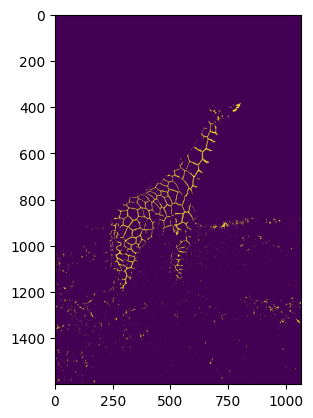

In [ ]:
plt.imshow(mask)

In [ ]:
black_hsv = np.uint8([[[120, 255, 0]]])
black_bgr = cv2.cvtColor(black_hsv, cv2.COLOR_HSV2BGR)[0][0]

# Defining a dark or "black" color and preparing to use it for further image processing

These lines define a color in the HSV color space and then convert it to the BGR color space. Specifically, they are defining a dark or "black" color and preparing to use it for further image processing.

-----
-----------
#Breakdown:

##black_hsv = np.uint8([[[120, 255, 0]]]):

This line defines a color in the HSV (Hue, Saturation, Value) color space.

np.uint8: Creates an 8-bit unsigned integer array, suitable for representing color values.

##[[[120, 255, 0]]]:

This represents the HSV values of the color:

##Hue (H):
120 (This could represent a shade around blue/green, depending on the HSV range being used)

##Saturation (S):
255 (Fully saturated, meaning the color is pure and not mixed with white)

##Value (V):
0 (Very dark, essentially black since there's no brightness)

------------------------------------
#black_bgr = cv2.cvtColor(black_hsv, cv2.COLOR_HSV2BGR)[0][0]:

This line converts the color from HSV to BGR (Blue, Green, Red), which is the color space often used by OpenCV.

##cv2.cvtColor():
This is the OpenCV function used for color space conversion.

##black_hsv:
The input color in HSV.

##cv2.COLOR_HSV2BGR:
Specifies the conversion from HSV to BGR.
[0][0]:

Explanation:

cv2.cvtColor(black_hsv, cv2.COLOR_HSV2BGR): This part of the code converts the color from HSV to BGR and returns a 3-dimensional NumPy array. The array structure looks like this: [[[B, G, R]]], where B, G, and R represent the Blue, Green, and Red color values, respectively.

[0][0]: This is used for indexing or accessing specific elements within the NumPy array.

[0]: This selects the first element of the outermost array, which is [[B, G, R]].

[0]: This selects the first element of the inner array, which is [B, G, R].

Since this is the final level, we get a 1-dimensional array with the actual BGR color values.

Result: Combining these indexing steps, [0][0] effectively extracts the BGR values of the converted color.


#In simpler terms:

Imagine the converted color is stored in a box within a box within a box.

The first [0] opens the outermost box to access the inner box.

The second [0] opens the inner box to access the actual color values (B, G, R).

---------------------
#Example:

If the converted color in BGR is (25, 50, 100), then black_bgr would be assigned the array [25, 50, 100] due to the [0][0] indexing.

This is used to access the color values from the resulting array, extracting the BGR values.

##Purpose:

The purpose of these lines is to define a color that will likely be used later to replace or modify pixels in an image.

By creating black_bgr, the code now has the BGR representation of the desired color ready for operations like replacing pixels within the masked region of an image.

-----------------------
#In simpler terms:

The first line is like saying, "I want a very dark blue/green color, but describe it using hue, saturation, and value."

The second line is like saying, "Okay, now translate that color description so that OpenCV understands it and can use it for its image operations."

In [ ]:
image_result = image.copy()
image_result[mask>0] = black_bgr

## Applying the mask

These lines are applying the color defined by black_bgr to the original image (image) but only where the mask (mask) has a value greater than 0 (which corresponds to the white or "selected" areas in the mask).

In essence, it's replacing specific regions of the original image with the color black_bgr.

---------
---------------
#Breakdown:

##image_result = image.copy():

This line creates a copy of the original image and assigns it to the variable image_result.

This is done to preserve the original image and work on a separate copy for modifications.

##image_result[mask>0] = black_bgr:

This line performs the color replacement. Let's break it down further:

##mask>0:
This creates a Boolean mask (an array of True/False values).

It evaluates each element of the mask array and sets it to True if the value is greater than 0, and False otherwise.

Remember that the mask contains 255 for the regions of interest (white pixels) and 0 for the rest (black pixels).

##image_result[mask>0]:
This selects the pixels in the image_result array where the corresponding element in the Boolean mask is True (i.e., where the mask has a value greater than 0).

##= black_bgr:
This assigns the color defined by black_bgr to the selected pixels in image_result.

---------------
#Purpose:

The purpose of these lines is to modify specific regions of the original image by applying the color black_bgr to those regions identified by the mask.

In this specific case, it's likely aiming to replace the "white-ish" areas (identified by the mask) with the dark color defined earlier.

---------------
#In simpler terms:

Imagine you have a picture, and you've created a stencil (the mask) to highlight certain areas.

These lines are like taking a paintbrush dipped in the color black_bgr and painting over the areas of the picture that are visible through the stencil.

It leaves the rest of the image untouched.

In [ ]:
image_result_rgb = cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB)

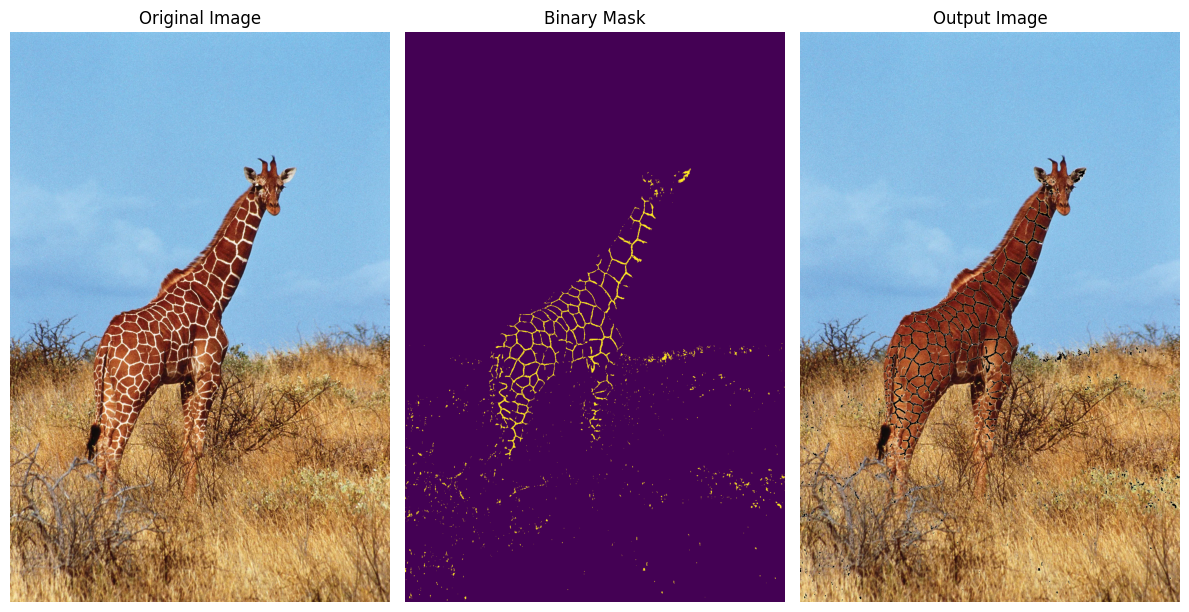

In [ ]:
# PLOT

fig, axs = plt.subplots(1,3, figsize=(12,6))

axs[0].imshow(image_rgb)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(mask)
axs[1].set_title("Binary Mask")
axs[1].axis('off')


axs[2].imshow(image_result_rgb)
axs[2].set_title("Output Image")
axs[2].axis('off')

plt.tight_layout()
plt.show()

# CV2 ADD Text

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

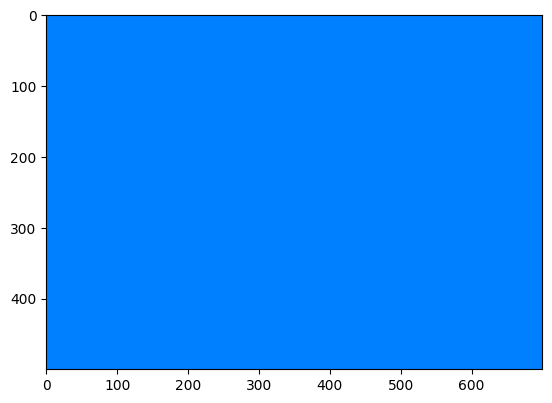

In [ ]:
height, width = 500, 700
sky_blue = (255, 127, 0)
canvas = np.full((height, width, 3), sky_blue, dtype=np.uint8)
canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)

plt.imshow(canvas)

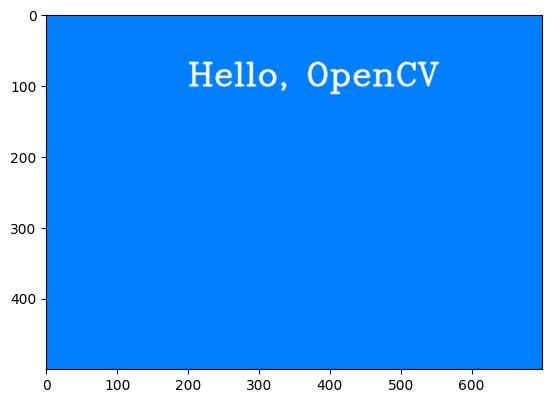

In [ ]:
text = "Hello, OpenCV"
font = cv2.FONT_HERSHEY_COMPLEX
# coordinate for the bootom left corner of the text
org = (200, 100)
font_scale = 1.5
color = (255, 255, 255)
thickness = 2

cv2.putText(canvas, text, org, font, font_scale, color, thickness, cv2.LINE_AA)

plt.imshow(canvas)

# Add Text
This code uses the OpenCV library (cv2) to add text to an image and then displays it using Matplotlib (plt).

-----------------
##text = "Hello, OpenCV":

This line defines the text string "Hello, OpenCV" that you want to add to the image.

##font = cv2.FONT_HERSHEY_COMPLEX":
This line selects the font type for the text. cv2.FONT_HERSHEY_COMPLEX is a built-in font style in OpenCV.

##org = (200, 100):
This line specifies the coordinates of the bottom-left corner of the text on the image.

 (200, 100) means the text will start 200 pixels to the right and 100 pixels down from the top-left corner of the image.

##font_scale = 1.5:
This sets the scaling factor for the font size.

A value of 1.5 means the font will be 1.5 times larger than the default size.

##color = (255, 255, 255):
This defines the color of the text in RGB format. (255, 255, 255) represents white.

##thickness = 2:
This sets the thickness of the lines used to draw the text, in pixels.

##cv2.putText(canvas, text, org, font, font_scale, color, thickness, cv2.LINE_AA):

This is the core function that adds the text to the image named canvas.

It takes all the parameters defined above to determine how the text should appear.

##cv2.LINE_AA
Is used for anti-aliasing to make the text look smoother.

Anti-aliasing is a technique used in computer graphics to reduce the visual artifacts that occur when displaying images or text at a lower resolution than they were originally created.

These artifacts, often called "jaggies" or "stair-stepping", appear as jagged edges along lines and curves.

##How anti-aliasing works:

Anti-aliasing works by blending the colors of the pixels along the edges of an object with the colors of the surrounding pixels.

This creates a smoother transition between the object and the background, reducing the appearance of jaggies.

In the code you provided, the cv2.LINE_AA flag is used in the cv2.putText() function to enable anti-aliasing for the text being drawn on the image.

This means that the edges of the text will be smoothed out, resulting in a more visually appealing result.

Without anti-aliasing, the text would appear pixelated and jagged, especially at smaller font sizes or when viewed on high-resolution displays.

In summary, anti-aliasing is a technique used to improve the visual quality of text and images by smoothing out jagged edges.

In the code you provided, cv2.LINE_AA is used to enable anti-aliasing for the text, making it look smoother and more professional.

---------------
##plt.imshow(canvas):
This line uses Matplotlib (plt) to display the image canvas with the added text. To see the output, run the code.

---------
#In summary
This code snippet takes an image (canvas), adds the text "Hello, OpenCV" to it with specific font, size, color, and position, and then displays the resulting image.



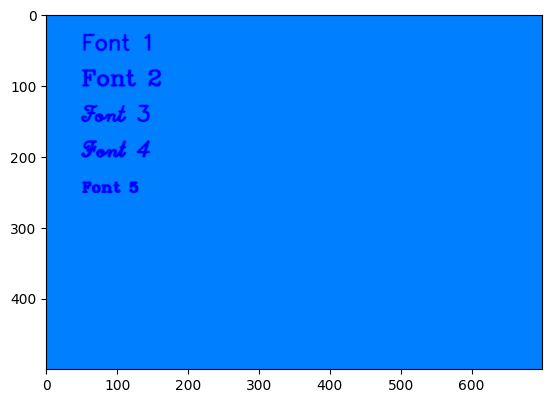

In [ ]:
canvas = np.full((height, width, 3), sky_blue, dtype=np.uint8)
canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)

fonts = [
    cv2.FONT_HERSHEY_SIMPLEX,
    cv2.FONT_HERSHEY_COMPLEX,
    cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
    cv2.FONT_HERSHEY_SCRIPT_COMPLEX,
    cv2.FONT_HERSHEY_COMPLEX_SMALL
]


y_offset = 50
for i, font in enumerate(fonts):
    text = f"Font {i+1}"
    cv2.putText(canvas, text, (50,y_offset), font, 1, (0,0, 255), 2, cv2.LINE_AA)
    y_offset+=50


plt.imshow(canvas)

# Demonstrate different font styles
This code demonstrates how to use different font styles available in OpenCV to write text on an image.

----
----
##canvas = np.full((height, width, 3), sky_blue, dtype=np.uint8):

This line creates a blank canvas (image) filled with sky_blue color.

##full:
This is a function within NumPy that creates a new array.

The term "full" indicates that the created array will be completely filled with a specified value.

The canvas has dimensions specified by height and width, and 3 color channels (RGB).

##dtype=np.uint8

indicates that the pixel values are unsigned 8-bit integers (0-255).

##canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB):

OpenCV by default uses the BGR color format, while Matplotlib uses RGB.

This line converts the canvas from BGR to RGB color format for proper display using plt.imshow().

-----------
##fonts = [...]:
This line defines a list named fonts containing different font styles available in OpenCV (e.g., cv2.FONT_HERSHEY_SIMPLEX, cv2.FONT_HERSHEY_COMPLEX, etc.).

##y_offset = 50:
This initializes a variable y_offset to 50.

This variable will be used to control the vertical position of the text on the canvas.

----------
##for i, font in enumerate(fonts): ...:

This loop iterates through each font style in the fonts list. enumerate provides both the index (i) and the value (font) for each item in the list.

##text = f"Font {i+1}":

This line creates the text string to be displayed, using an f-string to include the font number (index + 1).

##cv2.putText(...):
This line uses the cv2.putText() function to write the text on the canvas.

It takes the following arguments:

##canvas:
The image on which to draw the text.

##text:
The text string to be drawn.

##(50, y_offset):
The coordinates of the bottom-left corner of the text.

The x-coordinate is fixed at 50, while the y-coordinate is determined by y_offset.

##font:
The font style to use.

##1:
The font scale.

##(0, 0, 255):
The text color in RGB format (blue in this case).

##2:
The thickness of the text lines.

##cv2.LINE_AA:
 Flag for anti-aliasing to make the text look smoother.

##y_offset += 50:
This line increments the y_offset by 50 after each iteration, so that the next text is drawn 50 pixels below the previous one.

In this code, y_offset is a variable that controls the vertical position of the text being drawn on the image.

Here's a breakdown:

##Initialization:
y_offset is initialized to 50: y_offset = 50. This means the first line of text will be drawn 50 pixels down from the top of the image.

##Usage in the loop:
Inside the for loop, y_offset is used as the

    y-coordinate for the cv2.putText() function:
    
##cv2.putText(canvas, text, (50, y_offset), font, ...)

This determines the vertical placement of the text.

##Increment:
After each line of text is drawn, y_offset is incremented by 50: y_offset += 50.

This ensures that the next line of text is drawn 50 pixels below the previous one.

In summary, y_offset acts as a vertical spacing mechanism. It starts at 50, and with each iteration of the loop, it increases by 50, causing each subsequent line of text to be drawn further down the image.

Therefore, y_offset helps in arranging the text vertically on the image with a consistent spacing of 50 pixels between each line.

----------------
##plt.imshow(canvas):
This line displays the canvas with the text written on it using Matplotlib.

To see the output, run the code.

-----------------
#In essence
This code creates an image and writes multiple lines of text on it, each with a different font style, demonstrating the various font options available in OpenCV.

# Font size & thickness

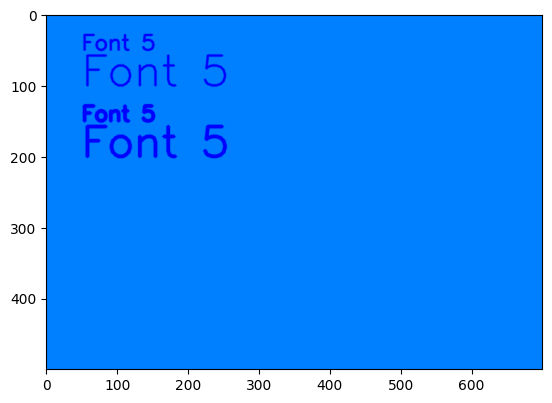

In [ ]:
canvas = np.full((height, width, 3), sky_blue, dtype=np.uint8)
canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)


styles = [
    (1,2),
    (2,2),
    (1,4),
    (2,4),
]

y_offset = 50
for font_scale, thickness in styles:
    text = f"Font {i+1}"
    cv2.putText(canvas, text, (50,y_offset), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0,0, 255), thickness, cv2.LINE_AA)
    y_offset+=50

plt.imshow(canvas)

# Demonstrate different styles
This code demonstrates how to use different font scales and thicknesses to write text on an image.

----------
-------
##canvas = np.full((height, width, 3), sky_blue, dtype=np.uint8):
This line creates a blank canvas (image) filled with sky_blue color.

It has dimensions specified by height and width, and 3 color channels (RGB).

dtype=np.uint8 indicates that the pixel values are unsigned 8-bit integers (0-255).

canvas = cv2.cvtColor(canvas, cv2.
COLOR_BGR2RGB):

OpenCV uses the BGR color format by default, while Matplotlib uses RGB. This line converts the canvas from BGR to RGB color format to display it correctly using plt.imshow().

----------------------
##styles = [...]:
This line defines a list named styles containing tuples representing different combinations of font scale and thickness.

##Each tuple has two elements:

the first element is the font scale, and the second element is the thickness.

##y_offset = 50:
This initializes a variable y_offset to 50.

 This variable will be used to control the vertical position of the text on the canvas.

##for font_scale, thickness in styles: ...:

 This loop iterates through each tuple in the styles list, assigning the values to font_scale and thickness respectively.

##text = f"Font {i+1}":
This line creates the text string to be displayed, using an f-string to include the font number.

Note that the value of 'i' is likely carried over from a previous loop in your full code. Ideally, it would be reset or a counter would be used inside this loop.

##cv2.putText(...):
This line uses the cv2.putText() function to write the text on the canvas.

It takes the following arguments:
canvas: The image on which to draw the text.
text: The text string to be drawn.

(50, y_offset): The coordinates of the bottom-left corner of the text.

The x-coordinate is fixed at 50, while the y-coordinate is determined by y_offset.

cv2.FONT_HERSHEY_SIMPLEX: The font style to use (always SIMPLEX in this loop).

font_scale: The font scale, taken from the current tuple in styles.

(0, 0, 255): The text color in RGB format (blue in this case).

thickness: The thickness of the text lines, taken from the current tuple in styles.


cv2.LINE_AA: Flag for anti-aliasing to make the text look smoother.

y_offset += 50: This line increments the y_offset by 50 after each iteration, so that the next text is drawn 50 pixels below the previous one.

plt.imshow(canvas): This line displays the canvas with the text written on it using Matplotlib.

--------

#In summary
This code creates an image and writes multiple lines of text on it, each with a different font scale and thickness, demonstrating the various styling options available in OpenCV.

# Perspective Transformation

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

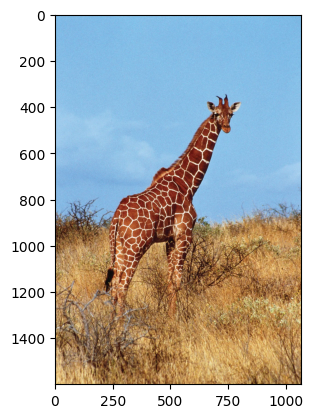

In [ ]:
image = cv2.imread("/content/giraffe-Kenya.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

In [ ]:
image_rgb.shape

(1600, 1067, 3)

# Perspective Transformation
Perspective transformation in the context of computer vision and image processing within Google Colab:

Perspective transformation, also known as homography, is a geometric transformation that maps points from one plane to another plane.

Unlike affine transformations (such as rotation, translation, scaling, and shearing) that preserve parallel lines, perspective transformations allow for changes in perspective, causing parallel lines to converge or diverge.

Here's a breakdown of perspective transformation:

----------------
---------------
##Purpose:
It's used to correct or simulate perspective distortions in images.

This is often used to transform an image as if it were viewed from a different angle or viewpoint.

-----------
##Applications:

##Image Rectification:
Correcting distorted images to a more canonical view, like transforming a slanted image of a document to a top-down view.

##Camera Calibration:
Determining camera parameters and correcting lens distortion.

##3D Reconstruction:
Creating 3D models from 2D images by understanding the perspective relationships.

##Augmented Reality:
Inserting virtual objects into real-world scenes by aligning perspectives.

---------------
##How It Works:

##Input:
Four corresponding points (also known as control points or keypoints) in the original image and the desired target image.

These points define the perspective mapping.

##Transformation Matrix:
A 3x3 homography matrix is calculated based on the input points.

This matrix encapsulates the perspective transformation.

Calculating the Homography Matrix

The homography matrix, denoted as H or M in code, is a 3x3 matrix that encapsulates the perspective transformation.

It is calculated using the four corresponding points (input and output points) you provide.

These points represent the corners of a quadrilateral in the original image and their corresponding positions in the desired transformed image.

The calculation involves solving a system of equations based on the relationships between these points.

OpenCV provides the cv2.getPerspectiveTransform() function to do this automatically.

Understanding the Homography Matrix Structure

The homography matrix has the following structure:

    [ h11  h12  h13 ]
    [ h21  h22  h23 ]
    [ h31  h32  h33 ]

Each element (hij) in the matrix plays a specific role in the transformation.

##h11, h12, h21, h22:
These elements represent scaling, rotation, and shearing effects.

They determine how the image is stretched, rotated, and skewed.

##h13, h23:
These elements control the horizontal and vertical translation (shifting) of the image.

##h31, h32:
These elements are responsible for perspective distortion.

They control how parallel lines converge or diverge in the transformed image.

##h33:
This element is usually set to 1 and acts as a scaling factor.

Applying the Homography Matrix

Once the homography matrix is calculated, it is used to warp the original image to the desired perspective.

This is done using the cv2.warpPerspective() function in OpenCV.

The function takes the original image, the homography matrix, and the desired output image size as input.

It then applies the transformation to each pixel in the original image, mapping it to its new position in the transformed image.

In simpler terms, the homography matrix acts as a mapping function.

It takes the coordinates of a point in the original image and transforms them to the corresponding coordinates in the transformed image, effectively changing the perspective of the image.

In summary, the 3x3 homography matrix is a crucial component of perspective transformation.

It is calculated using corresponding points in the original and desired images and encapsulates the transformation parameters.

 This matrix is then used to warp the image, achieving the desired perspective change.

##Warping:
The original image is warped using the homography matrix to create the transformed image.

-------------
##Logical Explanation of Homography
Okay, let's break down what the homography matrix does in logical terms within the context of perspective transformation:

Imagine a projector: You're shining a projector onto a screen, but the screen isn't perfectly aligned – it might be tilted, rotated, or even curved.

The image from the projector will appear distorted on the screen due to this misalignment.

The homography matrix is like a "correction lens" for this projector.

It figures out the exact transformation needed to make the projected image look "normal" on the misaligned screen.

Here's how it works logically:

##Identify Corresponding Points:
You need to identify at least four points in the original image (the projector's output) and their corresponding positions on the distorted image (the screen).

These points act as anchors, telling the homography matrix how the two planes are related.

##Calculate the Transformation:
Using these corresponding points, the homography matrix is calculated.

It's like figuring out the precise adjustments needed for the projector's lens to compensate for the screen's misalignment.

##Apply the Correction:
Once the homography matrix is known, it's used to transform every pixel in the original image.

This is like projecting the image through the "correction lens," warping it to fit perfectly onto the distorted screen.

In essence, the homography matrix:

##Maps points from one plane to another:
It establishes a relationship between the original image plane and the transformed image plane.

##Corrects perspective distortion:
It compensates for the distortions caused by changes in perspective, making parallel lines appear to converge or diverge as they would in the real world.

##Enables image rectification:
It can be used to "straighten out" images that are taken at an angle, making them appear as if they were viewed head-on.

Think of it like this:

If you take a picture of a building at an angle, the building's sides will appear to converge towards a vanishing point.

The homography matrix can be used to transform this image, making the building's sides appear parallel, as they would in a blueprint or architectural drawing.

In summary, the homography matrix is a mathematical tool that allows us to correct perspective distortions and map images between different planes.

It's like a "correction lens" that ensures images appear as they should, regardless of the viewing angle or perspective.

I hope this logical explanation helps you understand the role of the homography matrix in perspective transformation.

--------------
##Code Example (using OpenCV in Colab):

import cv2
    import numpy as np

    # Load the image
    image = cv2.imread("image.jpg")

    # Define input and output points
    input_points = np.float32([[50, 50], [200, 50], [50, 200], [200, 200]])
    
    output_points = np.float32([[10, 100], [200, 50], [100, 250], [300, 200]])

    # Calculate the homography matrix
    M = cv2.getPerspectiveTransform(input_points, output_points)

    # Apply the transformation
    transformed_image = cv2.warpPerspective(image, M, (image.shape[1], image.shape[0]))

    # Display the images
    cv2.imshow("Original Image", image)
    cv2.imshow("Transformed Image", transformed_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

--------------------
##In essence
Perspective transformation is a powerful technique in computer vision that allows us to manipulate the perspective of images, enabling various applications such as image correction, camera calibration, 3D reconstruction, and augmented reality.

In [ ]:
rows, cols, _ = image_rgb.shape

input_points = np.float32([[50, 50], [cols - 50, 50], [50, rows-50], [cols-50, rows-50]])

output_points = np.float32([[10, 100], [cols - 100, 50], [100, rows-10], [cols-50, rows-100]])

'''
Trasformation matrix for Perspective trasformation

3x3

a, b, c
d, e, f
g, h, 1

a,b,c is responsioble for horizontal scaling, rotation and tranlation
d,e,f is responsioble for vertical scaling, rotation and tranlation
g,h  : Perspective components that account for depth and skew

'''

M = cv2.getPerspectiveTransform(input_points, output_points)

print(M)

[[ 1.02287821e+00  6.29847356e-02 -4.42634568e+01]
 [-5.02940991e-02  1.04090741e+00  5.07662367e+01]
 [ 3.13145264e-05  2.80659423e-05  1.00000000e+00]]


# Perspective Transformation Explained

let's break down the code snippet you provided, which deals with perspective transformation:

----
-----------

##1. Getting Image Dimensions

    rows, cols, _ = image_rgb.shape

This line extracts the height (rows), width (cols), and number of color channels (which is ignored using _) from the shape of the image_rgb array.

This information is used to define the input and output points for the transformation.

-------------
##2. Defining Input and Output Points

    input_points = np.float32([[50, 50], [cols - 50, 50], [50, rows-50], [cols-50, rows-50]])

    output_points = np.float32([[10, 100], [cols - 100, 50], [100, rows-10], [cols-50, rows-100]])

##input_points:

This array defines four points in the original image that will be mapped to the corresponding points in the output image.

These points are chosen based on the desired perspective transformation.

This line defines the input_points variable, which is a NumPy array containing four points.

These points represent the corners of a quadrilateral in the original image that you want to transform using perspective transformation.

Breakdown:

##np.float32:
This specifies that the array should contain 32-bit floating-point numbers, which is the data type required by OpenCV for perspective transformation.

##[[50, 50], [cols - 50, 50], [50, rows-50], [cols-50, rows-50]]:

This part defines the four points themselves, using a nested list structure.

Each inner list represents a point with its x and y coordinates.

##[50, 50]:
This is the first point, located at (x=50, y=50) in the original image.

##[cols - 50, 50]:
This is the second point, located at (x=cols - 50, y=50). cols represents the width of the image, so this point is near the right edge of the image.

##[50, rows-50]:
This is the third point, located at (x=50, y=rows - 50).

rows represents the height of the image, so this point is near the bottom edge of the image.

##[cols-50, rows-50]:
This is the fourth point, located at (x=cols - 50, y=rows - 50).

This point is near the bottom-right corner of the image.

##In essence
These four points define a quadrilateral within the original image.

When you apply perspective transformation, this quadrilateral will be mapped to a new quadrilateral defined by the output_points, effectively changing the perspective of the image.

Visualization:

Imagine drawing a rectangle or a quadrilateral on your image using these four points as corners.

The perspective transformation will then distort this shape according to the output_points you define.

##output_points:
This array defines the corresponding four points in the output image where the input points will be mapped.

These points determine the new perspective of the image.

----------------
##3. Perspective Transformation Matrix

    M = cv2.getPerspectiveTransform(input_points, output_points)
    print(M)

##cv2.getPerspectiveTransform:

This function calculates the 3x3 perspective transformation matrix (M) based on the input and output points.

##print(M):

This line prints the calculated transformation matrix to the console.

The matrix M represents the transformation that will be applied to the image.

##Understanding the Transformation Matrix

As mentioned in the code comments, the 3x3 perspective transformation matrix has the following structure:

   [ a  b  c ]
   [ d  e  f ]
   [ g  h  1 ]

##a, b, c:
Responsible for horizontal scaling, rotation, and translation.

##d, e, f:
Responsible for vertical scaling, rotation, and translation.

##g, h:
Perspective components that account for depth and skew.

---------------------
#In summary:

This code snippet defines the input and output points for a perspective transformation, calculates the corresponding transformation matrix using

OpenCV's

    cv2.getPerspectiveTransform

function, and prints the matrix to the console.

This matrix can then be used to warp the image and achieve the desired perspective change

#Print the Perspective Image

(np.float64(-0.5), np.float64(1066.5), np.float64(1599.5), np.float64(-0.5))

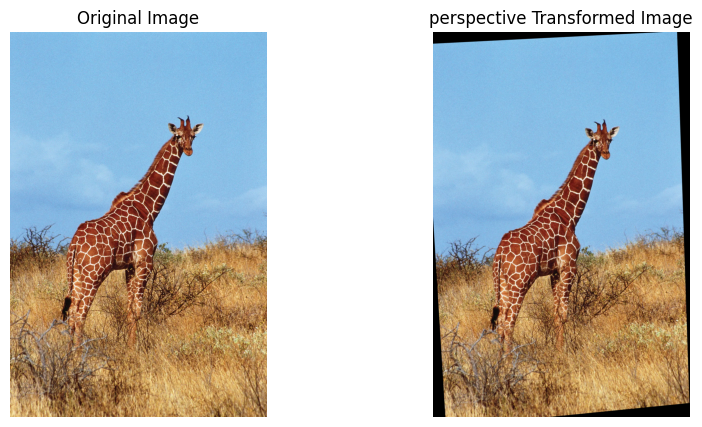

In [ ]:
perspective_image = cv2.warpPerspective(image_rgb, M, (cols, rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(perspective_image)
plt.title("perspective Transformed Image")
plt.axis("off")

# Applying Perspective Transformation

----------
----------------

##perspective_image = cv2.warpPerspective(image_rgb, M, (cols, rows))


##cv2.warpPerspective:

This function applies the perspective transformation to the image.

##image_rgb:
The input image (in RGB format).

##M:
The 3x3 transformation matrix calculated earlier using cv2.getPerspectiveTransform.

##(cols, rows):
The desired output image size (width, height), which in this case is the same as the original image size.

##perspective_image:
The variable that stores the transformed image after applying the perspective transformation.

-------------------------------
##2. Displaying the Results

    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(perspective_image)
    plt.title("perspective Transformed Image")
    plt.axis("off")

##plt.figure(figsize=(10,5)):
This line creates a Matplotlib figure with a specific size (10 inches wide, 5 inches tall) to display the images.

##plt.subplot(1,2,1):
This creates a subplot within the figure, dividing it into a 1x2 grid and selecting the first subplot (left side) for the original image.

##plt.imshow(image_rgb):
This displays the original image (image_rgb) in the first subplot.

##plt.title("Original Image"):
This sets the title of the first subplot.

##plt.axis("off"):
This hides the axes for the first subplot.

##plt.subplot(1,2,2):
This selects the second subplot (right side) for the transformed image.

##plt.imshow(perspective_image):
This displays the transformed image (perspective_image) in the second subplot.

##plt.title("perspective Transformed Image"):

 This sets the title of the second subplot.

##plt.axis("off"):
This hides the axes for the second subplot.

-------------------
##In summary:

This code applies the perspective transformation to the image using the calculated transformation matrix and displays the original and transformed images side-by-side for comparison using Matplotlib.

This allows you to visualize the effect of the perspective transformation on the image.

# Affine transformation

----
---
An affine transformation is a geometric transformation that preserves collinearity (straight lines remain straight) and ratios of distances (parallel lines remain parallel).

--------------------
#2x3 matrix for Affine transformation
An affine transformation in 2D space can be represented by a 2x3 matrix.

##Why 2x3?

Here's the breakdown:

##2D Transformation:
We are dealing with transformations in a 2-dimensional plane (x and y coordinates).

This means that we need to transform each point (x, y) in the input image to a new point (x', y') in the output image.

##Linear Transformation:
An affine transformation is a type of linear transformation.

Linear transformations can be represented by matrices.

##Matrix Multiplication:

To apply the transformation, we perform matrix multiplication between the transformation matrix and the coordinates of a point.

In this case, we need a 2x3 matrix to transform a 2D point (represented as a 1x2 or 2x1 matrix) to another 2D point.

Let's look at the structure of the 2x3 matrix:

    [ a  b  c ]
    [ d  e  f ]

##Understanding the Matrix

The 2x3 matrix represents a transformation that maps a 2D point (x, y) to a new 2D point (x', y').

##The transformation is performed using matrix multiplication:

    [ x' ]   [ a  b  c ]   [ x ]
    [ y' ] = [ d  e  f ] * [ y ]
    [ 1  ]   [ 0  0  1 ]   [ 1 ]

##Elements and Their Roles

###a, b, d, e: Linear Transformation

These elements control the linear part of the transformation, which includes:

###Scaling:
Changing the size of the object.

###Rotation:
Rotating the object around a point.
Shearing: Skewing the object along an axis.

Think of these elements as affecting the shape and orientation of the object.

###c, f: Translation

These elements control the translation part of the transformation, which involves:

###Shifting:
Moving the object horizontally (c) and vertically (f).

Think of these elements as affecting the position of the object.

##Example

Consider a simple translation:

If c = 10 and f = 5, it means the object will be shifted 10 units to the right and 5 units down.

###The other elements (a, b, d, e) would be set to their identity values (a = e = 1, b = d = 0) to preserve the shape and orientation.

Okay, let's delve into the concept of identity values and their role in preserving shape and orientation during an affine transformation:

-----------------------
##Identity Matrix and Transformation

In linear algebra, an identity matrix is a special matrix that, when multiplied by another matrix, leaves the other matrix unchanged.

For a 2x2 matrix, the identity matrix is:

     [ 1  0 ]
     [ 0  1 ]

When applying an affine transformation, if we only want to perform
##translation (shifting)

without affecting the shape or orientation of the object, we need to set the linear transformation components (a, b, d, e) to their identity values.

##Setting Elements to Identity Values

By setting:

##a = 1 and e = 1:
We ensure that there is no scaling along the x and y axes.

The object's size remains the same.

###b = 0 and d = 0:
We ensure that there is no rotation or shearing.

The object's orientation is preserved.

##Preserving Shape and Orientation

With these identity values, the linear transformation part of the affine transformation effectively becomes an identity transformation.

It leaves the shape and orientation of the object unchanged, and only the translation components (c, f) contribute to the final transformation.

In the context of the example I provided earlier:

If we want to translate the object by 10 units to the right and 5 units down without changing its shape or orientation, we would set the transformation matrix as follows:

    [ 1  0  10 ]
    [ 0  1   5 ]

This matrix performs only translation, leaving the object's shape and orientation intact.

###In summary:

Setting the linear transformation elements (a, b, d, e) to their identity values ensures that the affine transformation preserves the shape and orientation of the object, performing only translation as specified by the translation components (c, f).

In essence, the 2x3 matrix combines linear transformations (scaling, rotation, shearing) and translation into a single operation.

Therefore, a 2x3 matrix provides the necessary components to represent all the operations involved in an affine transformation in 2D space.

##Important Note:
For transformations in higher dimensions (e.g., 3D), the size of the matrix would change accordingly.

For example, a 3D affine transformation would be represented by a 3x4 matrix.

-----
#Types of Affine Transformations

Several common image manipulations are affine transformations:

##Rotation:
Rotating an image by a certain angle.

##Translation:
Shifting an image in the x and y directions.

##Scaling:
Resizing an image by a certain factor.

##Shearing:
Skewing an image along the x or y axis.

-----
----
Let's discuss the values of a, b, d, and e in the affine transformation matrix when performing scaling, rotation, and shearing:

--------------------------------
##Scaling

    a: Scaling factor along the x-axis.
    b: 0
    d: 0
    e: Scaling factor along the y-axis.

##Example:

To scale an object by a factor of 2 in the x-direction and 3 in the y-direction, the matrix would be:

  [ 2  0  0 ]
  [ 0  3  0 ]

-----
##Rotation

    a: cos(θ) (where θ is the rotation angle in radians)
    b: -sin(θ)
    d: sin(θ)
    e: cos(θ)

##Example:

To rotate an object by 45 degrees counterclockwise, the matrix would be:

    [ cos(45)  -sin(45)  0 ]
    [ sin(45)   cos(45)  0 ]

---------------------
##Shearing

    a: 1
    b: Shear factor along the x-axis (horizontal shear)
    d: Shear factor along the y-axis (vertical shear)
    e: 1
##Example:

To apply a horizontal shear of 0.5, the matrix would be:

    [ 1  0.5  0 ]
    [ 0   1   0 ]

------------------------------
##Important Notes:

These values can be combined to perform multiple transformations simultaneously.

The translation components (c, f) are independent and can be set to any desired values for shifting the object.

(np.float64(-0.5), np.float64(1066.5), np.float64(1599.5), np.float64(-0.5))

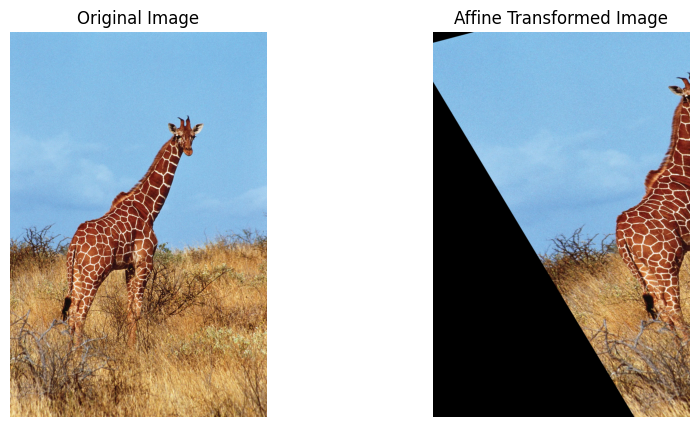

In [ ]:
input_points = np.float32([[50,50], [200, 50], [50, 200]])

output_points = np.float32([[10,100], [200, 50], [100, 250]])


M = cv2.getAffineTransform(input_points, output_points)

affine_image = cv2.warpAffine(image_rgb, M, (cols, rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(affine_image)
plt.title("Affine Transformed Image")
plt.axis("off")

# Perspective Transformation Display
Let's break down the code snippet you provided, which applies the perspective transformation and displays the results:

----
----
##1. Applying Perspective Transformation

    perspective_image = cv2.warpPerspective(image_rgb, M, (cols, rows))

##cv2.warpPerspective:
This function applies the perspective transformation to the image.

##image_rgb:
The input image (in RGB format).

##M:
The 3x3 transformation matrix calculated earlier using cv2.getPerspectiveTransform.

##(cols, rows):
The desired output image size (width, height), which in this case is the same as the original image size.

##perspective_image:
The variable that stores the transformed image after applying the perspective transformation.

----------------------------
##2. Displaying the Results

    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(perspective_image)
    plt.title("perspective Transformed Image")
    plt.axis("off")

##plt.figure(figsize=(10,5)):
This line creates a Matplotlib figure with a specific size (10 inches wide, 5 inches tall) to display the images.

##plt.subplot(1,2,1):
This creates a subplot within the figure, dividing it into a 1x2 grid and selecting the first subplot (left side) for the original image.

##plt.imshow(image_rgb):
This displays the original image (image_rgb) in the first subplot.

##plt.title("Original Image"):
This sets the title of the first subplot.

##plt.axis("off"):
This hides the axes for the first subplot.

##plt.subplot(1,2,2):
This selects the second subplot (right side) for the transformed image.

##plt.imshow(perspective_image):
This displays the transformed image (perspective_image) in the second subplot.

##plt.title("perspective Transformed Image"):

This sets the title of the second subplot.
plt.axis("off"): This hides the axes for the second subplot.

-----------------
##In summary:

This code applies the perspective transformation to the image using the calculated transformation matrix and displays the original and transformed images side-by-side for comparison using Matplotlib.

This allows you to visualize the effect of the perspective transformation on the image.

# Rotation
Okay, let's explore an intuitive explanation of how rotation works, specifically in the context of images and computer vision:

-----
---
Imagine a Ferris Wheel:

Think of an image as a grid of pixels, like seats on a Ferris wheel.

When you rotate the Ferris wheel, each seat moves along a circular path around the center. Similarly, when you rotate an image, each pixel moves along a circular path around the center of rotation.

##The Role of the Rotation Matrix:

In computer vision, we use a mathematical tool called the rotation matrix to represent and perform rotations. This matrix acts as a set of instructions that tell each pixel where to move during the rotation.

Here's a simplified breakdown:

##Center of Rotation:
You choose a point in the image as the center of rotation. This could be the center of the image or any other point you desire.

##Rotation Angle:
 You specify the angle by which you want to rotate the image. This angle determines how far each pixel will move along its circular path.

##Rotation Matrix Calculation:
Based on the center of rotation and the rotation angle, the rotation matrix is calculated.

This matrix contains trigonometric functions (sine and cosine) that determine the new coordinates of each pixel after rotation.

##Applying the Rotation:
The rotation matrix is applied to each pixel in the image. This involves multiplying the pixel's original coordinates by the rotation matrix, resulting in the pixel's new coordinates after rotation.

##Image Transformation:
The image is transformed by moving each pixel to its new location, creating the rotated version of the original image.

Key Intuition:

The key intuition here is that rotation involves moving each pixel along a circular path around the center of rotation.

The rotation matrix acts as a guide, telling each pixel where to move based on the desired angle of rotation.

Visualizing the Process:

If you imagine drawing lines connecting each pixel to the center of rotation, you'll see that these lines remain the same length after rotation.

This means that the distance of each pixel from the center of rotation is preserved, ensuring that the image is rotated without distortion.

-----------------------------------
#In summary
Rotation in computer vision involves moving each pixel along a circular path around a chosen center point. The rotation matrix is a mathematical tool that guides this process, ensuring that the image is rotated accurately and without distortion.

(np.float64(-0.5), np.float64(1066.5), np.float64(1599.5), np.float64(-0.5))

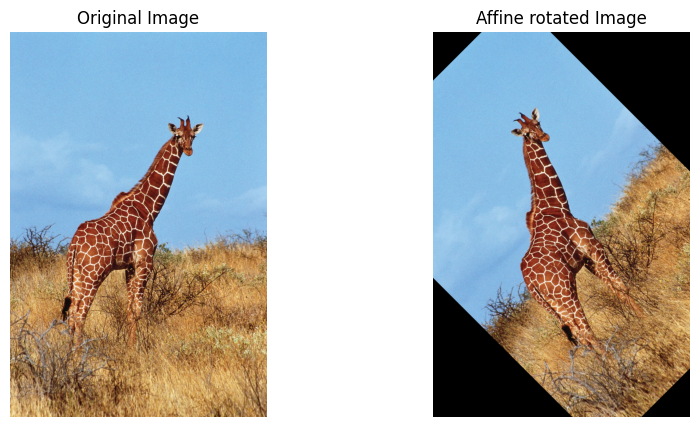

In [ ]:
angle = 45
center = (cols // 2, rows // 2)
scale = 1.0

M = cv2.getRotationMatrix2D(center,angle, scale)

rotated_image = cv2.warpAffine(image_rgb, M, (cols, rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(rotated_image)
plt.title("Affine rotated Image")
plt.axis("off")

# Rotation Explained
Let's break down the code snippet you provided for image rotation:

------------------------
------------------

##1. Defining Rotation Parameters

    angle = 45  # Rotation angle in degrees

    center = (cols // 2, rows // 2)  # Center of rotation (image center)
    scale = 1.0  # Scale factor (no scaling in this case)

##angle:
Sets the rotation angle to 45 degrees.

##center:
Defines the center point of rotation, which is the center of the image.

the meaning of
    center = (cols // 2, rows // 2) and scale = 1.0
in the context of image rotation:

center = (cols // 2, rows // 2)

center:
This variable stores the coordinates of the center point around which the image will be rotated.

(cols // 2, rows // 2):
This expression calculates the coordinates of the center point.

cols represents the width of the image (number of columns).

rows represents the height of the image (number of rows).

// is the floor division operator, which performs division and rounds down to the nearest integer.

Therefore, cols // 2 calculates the horizontal center of the image, and rows // 2 calculates the vertical center.

Combining these, (cols // 2, rows // 2) gives the coordinates of the image's center point.

scale = 1.0

scale: This variable controls the scaling factor applied to the image during rotation.

1.0:

Setting scale to 1.0 means that the image will be rotated without any scaling. The size of the image will remain the same after rotation.

In essence:

center = (cols // 2, rows // 2) specifies that the image will be rotated around its center point.

scale = 1.0 indicates that the image will be rotated without any change in its size.

##Example:

If you have an image with cols = 640 (width) and rows = 480 (height), then:

center will be (320, 240), which is the center of the image.

scale will be 1.0, so the image will be rotated without scaling.

##scale:
Sets the scaling factor to 1.0, meaning no scaling is applied during rotation.

----------------------
##2. Getting Rotation Matrix

    M = cv2.getRotationMatrix2D(center, angle, scale)

##cv2.getRotationMatrix2D:
This function calculates the 2x3 affine transformation matrix (M) for rotation.

It takes the center of rotation, angle, and scale as input.

------------------
##3. Applying Rotation

    rotated_image = cv2.warpAffine(image_rgb, M, (cols, rows))

##cv2.warpAffine:
This function applies the affine transformation (rotation in this case) to the image.

##image_rgb:
The input image.

##M:
The rotation matrix.

##(cols, rows):
The output image size (same as the original).

-------------------
##4. Displaying Results

    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(rotated_image)
    plt.title("Affine rotated Image")
    plt.axis("off")

This part of the code is similar to the previous example.

It creates a figure and two subplots to display the original and rotated images side-by-side using Matplotlib.

---------------------
#In summary:

This code snippet rotates the input image by 45 degrees counterclockwise around its center point using an affine transformation. The rotated image is then displayed alongside the original image for comparison.

(np.float64(-0.5), np.float64(2133.5), np.float64(1599.5), np.float64(-0.5))

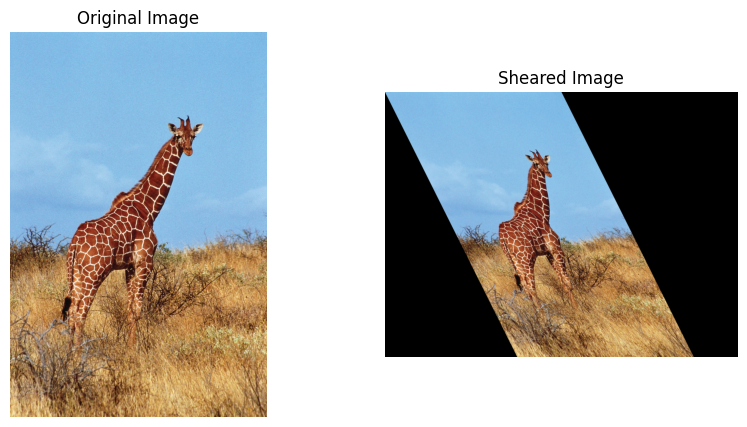

In [ ]:
# angle = 45
# center = (cols // 2, rows // 2)
# scale = 1.0

shear_x, shear_y = 0.5, 0

M = np.float32([[1, shear_x, 0],
           [shear_y, 1, 0]])


sheared_image = cv2.warpAffine(image_rgb, M, (cols*2, rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sheared_image)
plt.title("Sheared Image")
plt.axis("off")

# Translation
Translation is a geometric transformation that moves an object from one location to another without changing its size, shape, or orientation.

It's essentially a shift in the object's position.

In image processing, translation is often used to reposition an image or a region within an image. It can be applied to entire images or to specific objects or features within an image.

--------------
---
Here's a breakdown of the key aspects of translation:

##Movement:
Translation involves moving an object along a straight line in a particular direction.

##Direction:
The direction of translation is specified by a translation vector, which defines the horizontal (x) and vertical (y) displacements.

##Magnitude:
The magnitude of translation is the distance the object is moved, determined by the length of the translation vector.

##Preservation:
Translation preserves the object's size, shape, and orientation. It only changes its position.

In mathematical terms, translation is represented by adding a translation vector to the coordinates of each point in the object.

For example, if we want to translate an image by 10 pixels to the right and 5 pixels down, we would add the translation vector (10, 5) to the coordinates of each pixel in the image.

-----------------
Here's a simple illustration:

    Original point: (x, y)
    Translation vector: (tx, ty)
    Translated point: (x + tx, y + ty)

In computer vision, translation is a fundamental operation used in various tasks, such as:

##Object Tracking:
Tracking the movement of objects in video sequences.

##Image Registration:
Aligning multiple images of the same scene.

##Image Stitching:
Combining multiple images to create a panorama.

(np.float64(-0.5), np.float64(1066.5), np.float64(1599.5), np.float64(-0.5))

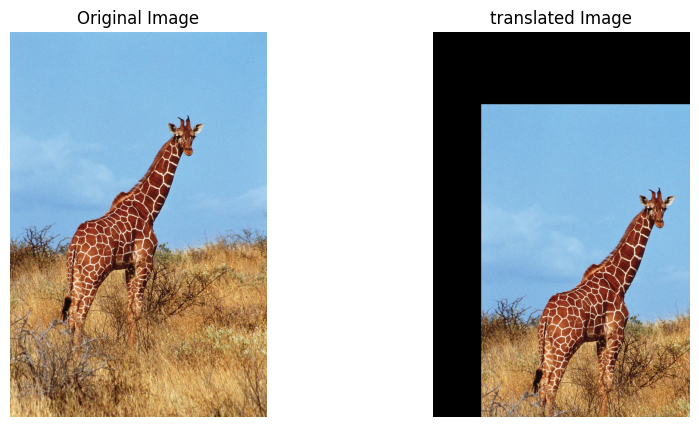

In [ ]:
# angle = 45
# center = (cols // 2, rows // 2)
# scale = 1.0

tx, ty = 200, 300

M = np.float32([[1, 0, tx],
           [0, 1, ty]])


translated_image = cv2.warpAffine(image_rgb, M, (cols, rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(translated_image)
plt.title("translated Image")
plt.axis("off")

#Translation Explained

----
----
#Defining Translation Parameters
tx, ty = 200, 300

##tx:
Represents the translation along the x-axis (horizontal shift).

In this case, it's set to 200 pixels.

##ty:
Represents the translation along the y-axis (vertical shift).

It's set to 300 pixels.

##Creating the Transformation Matrix
    M = np.float32([[1, 0, tx],
                  [0, 1, ty]])

This creates a 2x3 transformation matrix M specifically for translation.

The elements tx and ty are placed in the third column, responsible for shifting the image.

The other elements are set to their identity values (1 for scaling and 0 for rotation/shearing) to preserve the image's shape and orientation.

----------------------------------------------------------------------------------
##Applying the Translation

    translated_image = cv2.warpAffine(image_rgb, M, (cols, rows))

##cv2.warpAffine
 is used to apply the affine transformation (translation in this case).

##image_rgb:
The input image.

##M:
The translation matrix.

##(cols, rows):
The output image size (same as the original).

---------------
##Displaying the Results
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(translated_image)
    plt.title("translated Image")
    plt.axis("off")

This part creates a Matplotlib figure with two subplots to display the original and translated images side-by-side for comparison.

-------------------------------
#In summary:

This code snippet translates the input image by 200 pixels to the right and 300 pixels down using an affine transformation.

It preserves the image's original size, shape, and orientation while shifting its position.